In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [9]:
#Realizamos la carga del primer CSV
df_activity = pd.read_csv("files/Customer Flight Activity.csv")
#Realizamos la carga del segundo CSV
df_loyalty = pd.read_csv("files/Customer Loyalty History.csv")
#unimos ambos df en uno solo
Dfconjunto= df_activity.merge(df_loyalty,on=["Loyalty Number"])

¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

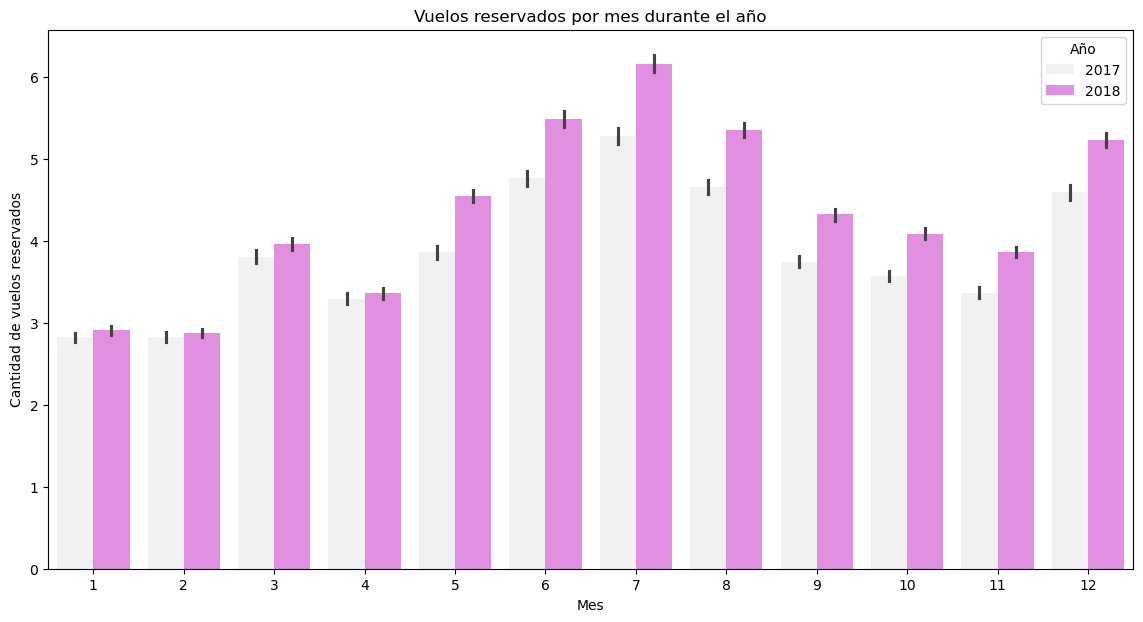

In [10]:
plt.figure(figsize=(14,7)) #queda más bonito si le metemos el size para que sea más grande. sino es más compacto
sns.barplot(data=Dfconjunto, x='Month', y='Flights Booked', hue='Year', palette= 'light:violet')
plt.title('Vuelos reservados por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.legend(title='Año')
plt.show()

¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

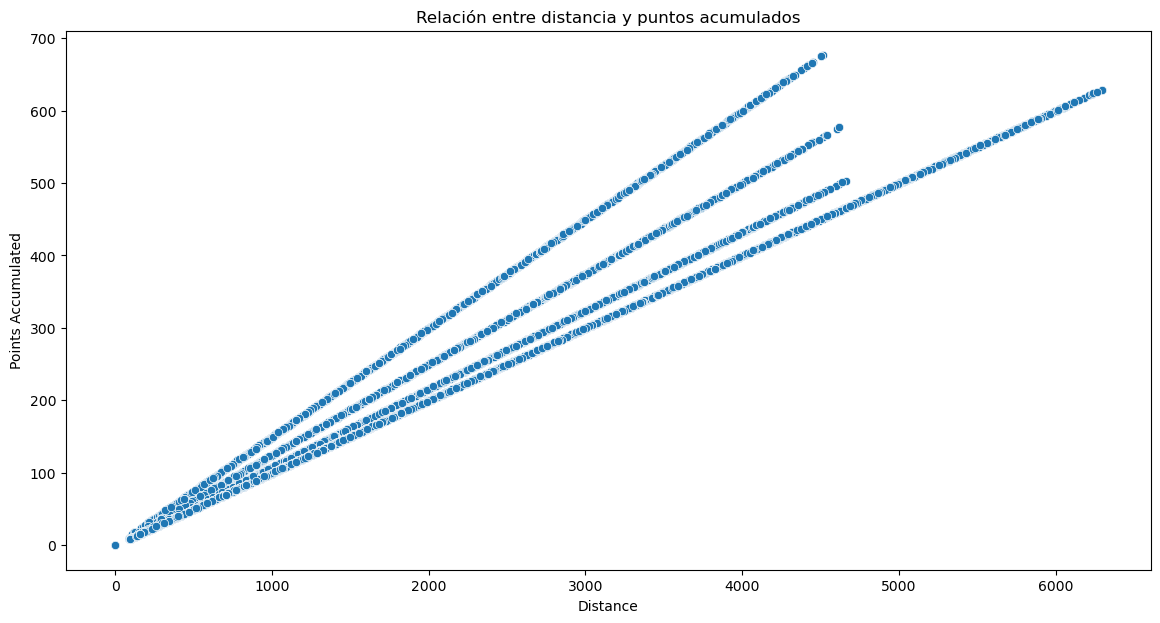

In [11]:

plt.figure(figsize=(14,7)) #queda más bonito si le metemos el size para que sea más grande. sino es más compacto
sns.scatterplot(data=Dfconjunto, x='Distance', y='Points Accumulated')
plt.title('Relación entre distancia y puntos acumulados')
plt.xlabel('Distance')
plt.ylabel('Points Accumulated')
plt.show()

¿Cuál es la distribución de los clientes por provincia o estado?

In [12]:
Clientesnodupe = Dfconjunto.drop_duplicates(subset=['Loyalty Number'], keep='last')

In [13]:
Provincianos = Clientesnodupe.sort_values(by='Province')

In [14]:
provinporclient = Provincianos['Province'].value_counts().sort_index()
print(provinporclient)

Province
Alberta                  969
British Columbia        4409
Manitoba                 658
New Brunswick            636
Newfoundland             258
Nova Scotia              518
Ontario                 5404
Prince Edward Island      66
Quebec                  3300
Saskatchewan             409
Yukon                    110
Name: count, dtype: int64


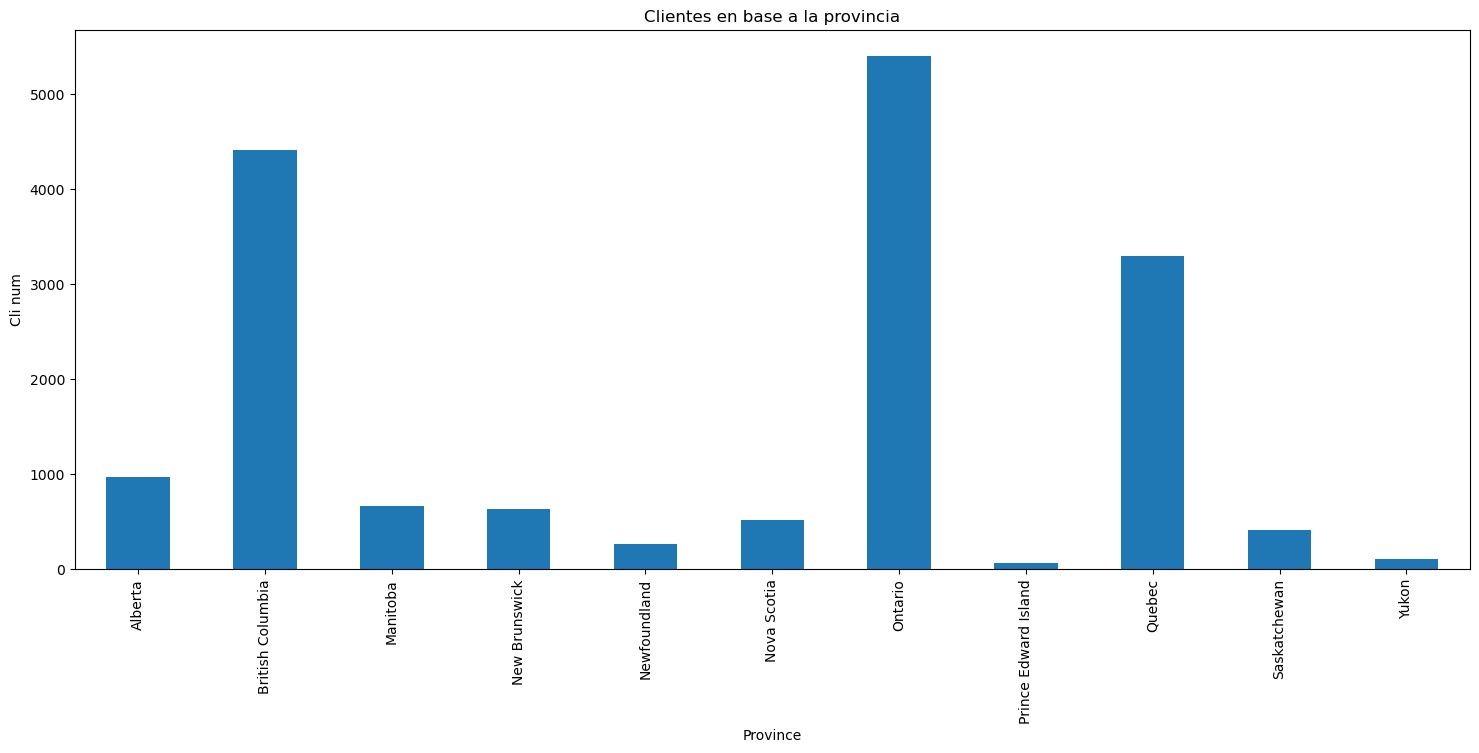

In [18]:
provinporclient.plot(kind='bar', figsize=(18,7), title='Clientes en base a la provincia')
plt.xlabel('Province')
plt.ylabel('Cli num')
plt.show()